# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane had the largest sample sizes
- From the box plot these two drugs seem to have the greatest impact on final tumor size
- The linear regression and correlation coeficient shows there is a positve  and significant correlation between mouse weight and tumor volume
- Further analysis is needed to examine the average mouse weight to determine drug effectiveness
 

In [196]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sn

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata,study_results,how="outer",on="Mouse ID")
# Display the data table for preview
mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [3]:
# Checking the number of mice.
mouse_count = len(mouse_df["Mouse ID"].unique())
mouse_count

249

In [4]:
mouse_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_id = mouse_df[mouse_df[["Mouse ID","Timepoint"]].duplicated(keep=False)]
duplicate_id["Mouse ID"].unique()

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_data = mouse_df.loc[mouse_df["Mouse ID"]=="g989"]
duplicate_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data = mouse_df[mouse_df["Mouse ID"] != "g989"]
mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
correct_count = len(mouse_data["Mouse ID"].unique())
correct_count

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

#mean tumor volume
mean_data = mouse_data.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
mean_data = mean_data.rename("Mean Tumor Volume")


In [10]:
#Median data
median_data = mouse_data.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
median_data = median_data.rename("Median Tumor Volume")

In [11]:
#variance of data
variance_data = mouse_data.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
variance_data = variance_data.rename("Tumor Volume Variance")

In [12]:
#standard deviation of data
stand_dev = mouse_data.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
stand_dev = stand_dev.rename("Tumor Volume Std. Dev.")


In [13]:
#standard error of data
stand_err = mouse_data.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]
stand_err =stand_err.rename("Tumor Volume Std. Err.")

In [14]:
#merge data
summary_df = pd.DataFrame(mean_data).join(median_data).join(variance_data).join(stand_dev).join(stand_err)

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

agg_data = mouse_data.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})
agg_data

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [16]:
#series for count of time count per drug regimen
time_point_df = mouse_data.groupby("Drug Regimen").count().sort_values("Timepoint", ascending=False)["Timepoint"]

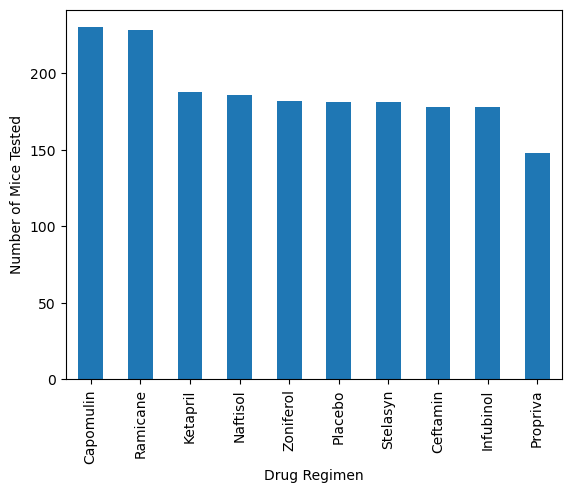

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.


time_point_bar = time_point_df.plot.bar(x="Drug Regimen", 
                                        y= "Timepoint",
                                       ylabel = "Number of Mice Tested")


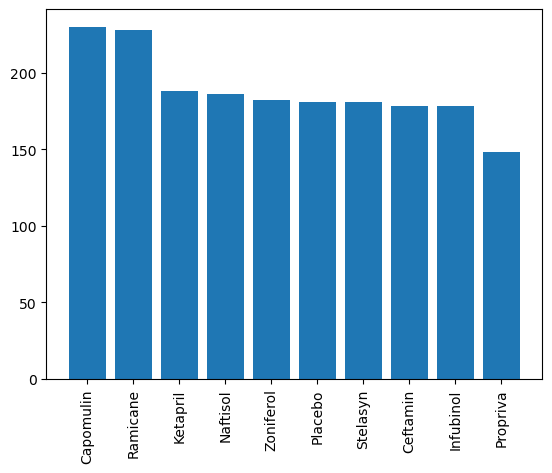

In [18]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x= time_point_df.index
y= time_point_df

plt.bar(x,y,)
plt.xticks(rotation="vertical")
plt.show()


In [19]:
male_vs_female = mouse_data["Sex"].value_counts()


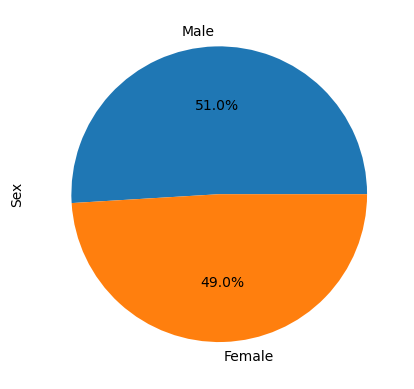

In [300]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_vs_female.plot(kind="pie", autopct='%1.1f%%')
plt.show()

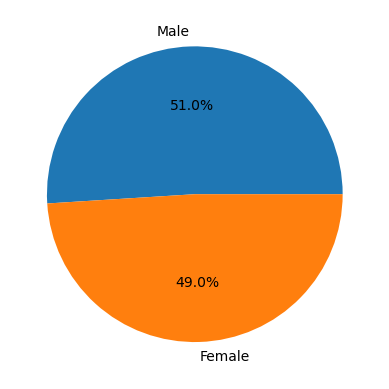

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
size = [51,49]

plt.pie(size, labels=labels, autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [44]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment


# Start by getting the last (greatest) timepoint for each mouse
mouse_id = mouse_data["Mouse ID"].unique()
greatest_time_point=[]

for mouse in mouse_id:
    mouse_tp = mouse_data.loc[mouse_data["Mouse ID"]==mouse,"Timepoint"].max()
    greatest_time_point.append(mouse_tp)

dict = {"Mouse ID": mouse_id,
       "Timepoint": greatest_time_point}
group_df = pd.DataFrame(dict)

group_df.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

tumor_volume_df = pd.merge(group_df, mouse_data, on=["Mouse ID","Timepoint"])

tumor_volume_df


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,k403,45,Ramicane,Male,21,16,22.050126,1
1,s185,45,Capomulin,Female,3,17,23.343598,1
2,x401,45,Capomulin,Female,16,15,28.484033,0
3,m601,45,Capomulin,Male,22,17,28.430964,1
4,g791,45,Ramicane,Male,11,16,29.128472,1
...,...,...,...,...,...,...,...,...
243,z314,5,Stelasyn,Female,21,28,45.934712,0
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [119]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
print(treatment)

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


In [270]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []
capomulin = []
ramicane = []
infubinol = []
ceftamin = []

In [272]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
treatment_df = tumor_volume_df.loc[tumor_volume_df["Drug Regimen"].isin(treatment),:]
treatment_df

for drug in treatment:
    volume_list = treatment_df.loc[treatment_df["Drug Regimen"]==drug,:]["Tumor Volume (mm3)"]
    if drug == "Capomulin":
        capomulin = volume_list.values.tolist()
    elif drug == "Ramicane":
        ramicane = volume_list.values.tolist()
    elif drug == "Infubinol":
        infubinol = volume_list.values.tolist()
    elif drug == "Ceftamin":
        ceftamin = volume_list.values.tolist()



In [111]:
    # add subset 
subset_df = treatment_df[["Drug Regimen","Tumor Volume (mm3)"]]
subset_df

,Drug Regimen,Tumor Volume (mm3)
0,Ramicane,22.050126
1,Capomulin,23.343598
2,Capomulin,28.484033
3,Capomulin,28.430964
4,Ramicane,29.128472
...,...,...
234,Ceftamin,61.386660
236,Infubinol,67.685569
240,Ceftamin,68.594745
241,Ceftamin,64.729837


In [145]:
    # Determine outliers using upper and lower bounds

    
for drug in treatment:
        tumor_vol = subset_df.loc[subset_df["Drug Regimen"] == drug, ["Tumor Volume (mm3)"]]
        lower_out = tumor_vol.loc[tumor_vol["Tumor Volume (mm3)"]<tumor_vol["Tumor Volume (mm3)"].quantile(.25)]
        upper_out = tumor_vol.loc[tumor_vol["Tumor Volume (mm3)"]>tumor_vol["Tumor Volume (mm3)"].quantile(.75)]
        print(f"{drug}'s potential outliers:", lower_out, upper_out)


Capomulin's potential outliers:     Tumor Volume (mm3)
1            23.343598
2            28.484033
3            28.430964
6            30.485985
10           31.023923
12           31.896238      Tumor Volume (mm3)
36            40.658124
38            40.728578
39            41.483008
40            41.581521
45            47.685963
180           46.539206
Ramicane's potential outliers:     Tumor Volume (mm3)
0            22.050126
4            29.128472
5            30.276232
7            30.564625
8            30.638696
11           31.095335     Tumor Volume (mm3)
42           40.667713
43           45.220869
44           43.047543
46           43.419381
47           43.166373
48           44.183451
Infubinol's potential outliers:      Tumor Volume (mm3)
74            36.321346
145           47.010364
162           45.699331
205           46.250112
210           51.542431
217           50.005138      Tumor Volume (mm3)
49            67.973419
58            66.083066
70            

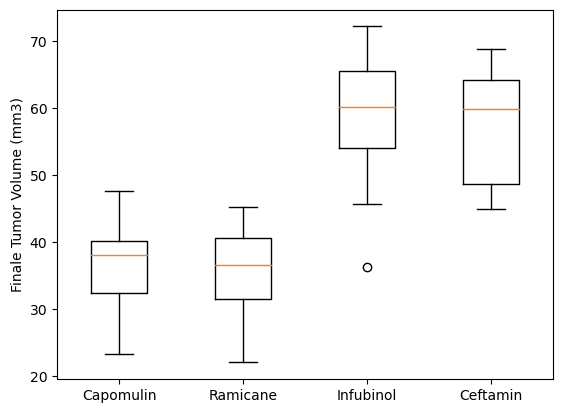

In [299]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
df_data = {treatment[0]: capomulin, treatment[1]: ramicane, treatment[2]: infubinol, treatment[3]: ceftamin}
data = pd.DataFrame(df_data)

fig, ax = plt.subplots()

ax.boxplot(dict.values(), labels= treatment)
plt.ylabel("Finale Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

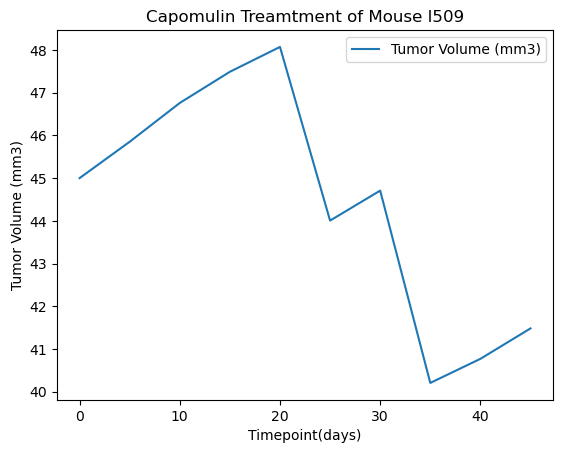

In [174]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap_df = mouse_data.loc[mouse_data["Mouse ID"]=="l509"]

cap_df.plot(kind="line", x = "Timepoint", y = "Tumor Volume (mm3)",
            title="Capomulin Treamtment of Mouse l509",
            xlabel= "Timepoint(days)",
            ylabel= "Tumor Volume (mm3)")
plt.show()

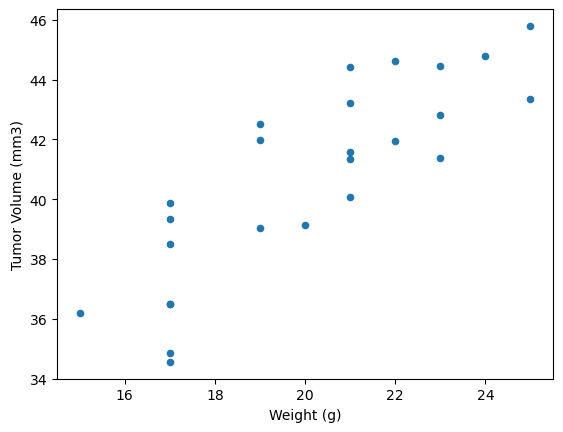

In [184]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
weight_df = mouse_data.groupby(["Mouse ID","Drug Regimen"]).mean()
weight_df = weight_df.reset_index()
weight_df = weight_df[weight_df["Drug Regimen"]=="Capomulin"]

weight_df.plot.scatter(x = "Weight (g)",
                      y = "Tumor Volume (mm3)")
plt.show()



## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


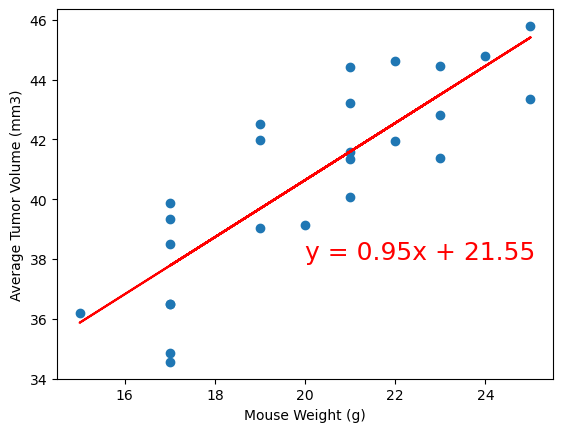

In [217]:
# Calculate the correlation coefficient and linear regression model
# for mouse weight and average tumor volume for the Capomulin regimen

#x and y values
weight = weight_df.loc[:,"Weight (g)"]
volume = weight_df.loc[:,"Tumor Volume (mm3)"]

#correlation coefficient
corr_coef = st.pearsonr(weight,volume)
print(f"The correlation between mouse weight and average tumor volume is {round(corr_coef[0],2)}")

#linear regression and ploting
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight,volume)
regress_values = weight * slope + intercept
line_eq = "y = "+str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight,volume)
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=18,color="red")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


